##### Processamento de Linguagem Natural e Adapatação de Domínio
---
> com a biblioteca Adapt

Criar ambiente virtual do python

* Passo 1: Abrir o terminal integrado no VS Code (Ctrl + `)

* Passo 2: Navegar até o diretório do projeto
```cd caminho/do/seu/projeto```

* Passo 3: Criar o ambiente virtual
```python -m venv nome_do_ambiente```

* Passo 4: Ativar o ambiente virtual
```nome_do_ambiente\Scripts\activate```

Instalar bibliotecas auxiliares
```
pip install numpy==1.26.2 scipy==1.11.4 tensorflow==2.15.0 scikit-learn==1.3.2 cvxopt==1.3.2 scikeras==0.12.0 pandas==2.2.3 matplotlib==3.9.2 wordcloud==1.9.3 transformers==4.45.2 torch==2.4.1
```

Instalar biblioteca ADAPT

```pip install adapt```

In [3]:
import pandas as pd

# sources
imdb = pd.read_csv("source/imdb.txt", names=["text", "sentiment"], sep="\t")
yelp = pd.read_csv("source/yelp.txt", names=["text", "sentiment"], sep="\t")
amazon = pd.read_csv("source/amazon.txt", names=["text", "sentiment"], sep="\t")
chat = pd.read_csv("source/chat.csv", header=0, names=["text", "sentiment"], sep=",")

# targets
hum2000 = pd.read_csv("target/hum2000.csv")
hum3000 = pd.read_csv("target/hum3000.csv")
med5000 = pd.read_csv("target/med5000.csv")

# binary sentiment
chat["sentiment"] = chat["sentiment"].apply(lambda x: 1 if x == "positive" else 0)

In [4]:
print("IMDB:", imdb.shape)
print("Yelp:", yelp.shape)
print("Amazon:", amazon.shape)
print("Chat:", chat.shape)
print("Hum2000:", hum2000.shape)
print("Hum3000:", hum3000.shape)
print("Med5000:", med5000.shape)

IMDB: (748, 2)
Yelp: (1000, 2)
Amazon: (1000, 2)
Chat: (584, 2)
Hum2000: (2141, 4)
Hum3000: (3029, 4)
Med5000: (5181, 4)


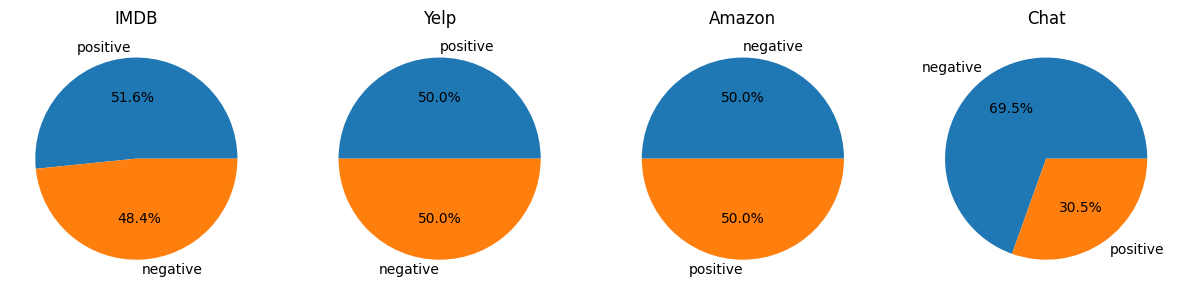

In [5]:
import matplotlib.pyplot as plt

# gráficos de distribuição do sentimento
fig, axs = plt.subplots(1, 4, figsize=(15, 9))

imdb["sentiment"].map({0: "negative", 1: "positive"}).value_counts().plot(
    kind="pie", ax=axs[0], title="IMDB", autopct="%1.1f%%"
).set_ylabel("")
yelp["sentiment"].map({0: "negative", 1: "positive"}).value_counts().plot(
    kind="pie", ax=axs[1], title="Yelp", autopct="%1.1f%%"
).set_ylabel("")
amazon["sentiment"].map({0: "negative", 1: "positive"}).value_counts().plot(
    kind="pie", ax=axs[2], title="Amazon", autopct="%1.1f%%"
).set_ylabel("")
chat["sentiment"].map({0: "negative", 1: "positive"}).value_counts().plot(
    kind="pie", ax=axs[3], title="Chat", autopct="%1.1f%%"
).set_ylabel("")
plt.show()

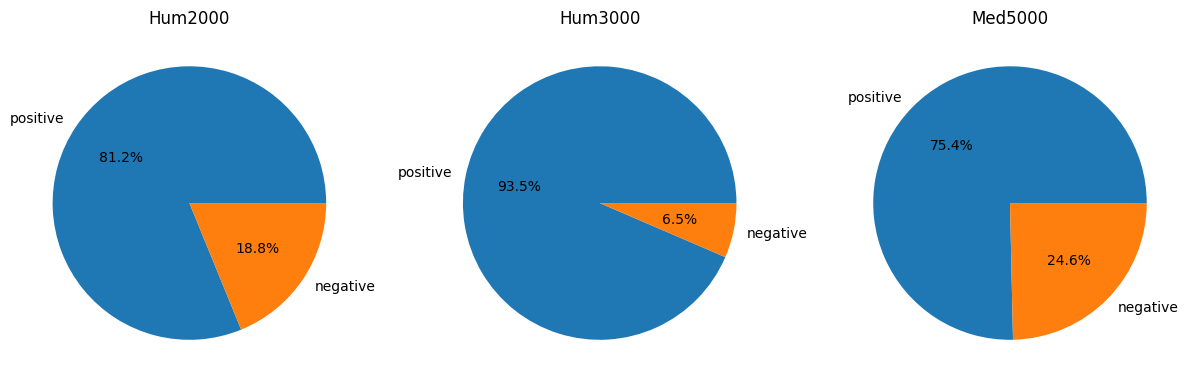

In [6]:
# gráficos de distribuição do sentimento
fig, axs = plt.subplots(1, 3, figsize=(15, 9))
hum2000["sentiment"].map({0: "negative", 1: "positive"}).value_counts().plot(
    kind="pie", ax=axs[0], title="Hum2000", autopct="%1.1f%%"
).set_ylabel("")
hum3000["sentiment"].map({0: "negative", 1: "positive"}).value_counts().plot(
    kind="pie", ax=axs[1], title="Hum3000", autopct="%1.1f%%"
).set_ylabel("")
med5000["sentiment"].map({0: "negative", 1: "positive"}).value_counts().plot(
    kind="pie", ax=axs[2], title="Med5000", autopct="%1.1f%%"
).set_ylabel("")
plt.show()

In [7]:
import string as st

def remove_no_strings(text):
    return "".join([ch if isinstance(ch, str) else " " for ch in text])


def remove_digits(text):
    return "".join([ch if ch not in st.digits else " " for ch in text])


def remove_simbols(text):
    return "".join(
        [
            ch if ch not in ['"', "¾", "^", "š", "\\", "º", "ª", "®️", "©️", "_"] else " "
            for ch in text
        ]
    )


def remove_punctuation(text):
    return "".join([ch if ch not in st.punctuation else " " for ch in text])


def remove_trash(text):
    return "".join(
        [ch if ch in st.ascii_letters or ch in st.punctuation else " " for ch in text]
    )


# pré-processando o Dataframe
def pre_process(df):
    df.dropna(inplace=True)
    df["text"] = df["text"].apply(lambda x: remove_no_strings(x))
    df["text"] = df["text"].apply(lambda x: remove_digits(x))
    df["text"] = df["text"].apply(lambda x: remove_simbols(x))
    df["text"] = df["text"].apply(lambda x: remove_punctuation(x))
    df["text"] = df["text"].apply(lambda x: remove_trash(x))

In [8]:
pre_process(imdb)
pre_process(yelp)
pre_process(amazon)
pre_process(chat)
pre_process(hum2000)
pre_process(hum3000)
pre_process(med5000)

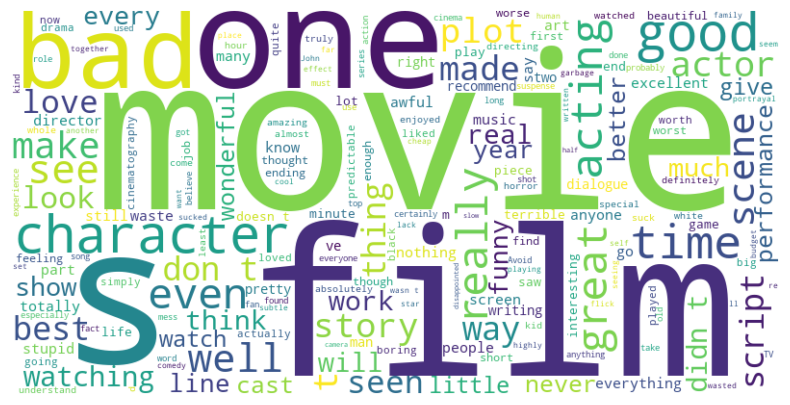

In [9]:
# nuvem de palavras - IMDB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(imdb["text"])
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

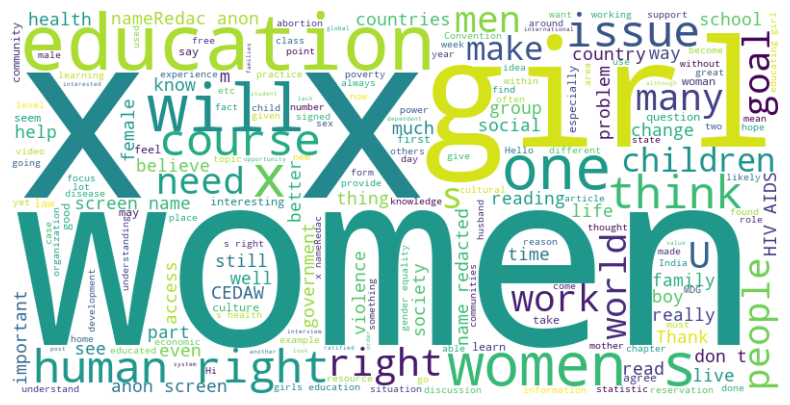

In [10]:
# nuvem de palavras - Hum2000
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(hum2000["text"])
)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Representação Vetorial

<img src="./img/term-document.png" width="900"/>

<img src="./img/term-document2.png" width="900"/>

<img src="./img/term-document3.png" width="900"/>

##### TF-IDF

O <b>TF-IDF</b> (Term Frequency - Inverse Document Frequency) é amplamente utilizada em recuperação de informações e mineração de texto para avaliar a importância de uma palavra em um documento em relação a um corpus de documentos.

O valor TF-IDF é calculado multiplicando o TF pelo IDF:
\begin{equation}
TF\text{-}IDF(t, d, D) = \frac{f_{t,d}}{\sum_{t^\prime \in d} f_{t^\prime,d}} \times \log \left( \frac{N}{|\{d \in D : t \in d\}|} \right)    \text{.}
\end{equation}

<img src="./img/tf.png" width="900"/>

<img src="./img/idf.png" width="900"/>

<img src="./img/tf-idf.png" width="900"/>

##### Representação Vetorial com TF-IDF

In [89]:
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True, ngram_range=(1, 1), stop_words="english")

from adapt.feature_based import DeepCORAL, DANN

# Imdb - DEEP CORAL
Xs = tfidf.fit_transform(imdb["text"]).toarray()
ys = imdb["sentiment"].to_numpy()

# Imdb x Hum2000
Xt = tfidf.transform(hum2000["text"]).toarray()
model = DeepCORAL(lambda_=5, Xt=Xt, metrics=["acc", "mse"], random_state=0)
model.fit(Xs, ys, epochs=100, verbose=0)

print("UDA DeepCORAL Imdb x Hum2000 - Sentiment")
yt = hum2000["sentiment"].to_numpy()
model.score(Xt, yt)

UDA DeepCORAL Imdb x Hum2000 - Sentiment
1/1 [==============================] - 0s 156ms/step - loss: 0.2373 - acc: 0.8001 - mse: 0.2373


0.2373279184103012

In [12]:
# Imdb - DANN
Xs = tfidf.fit_transform(imdb["text"]).toarray()
ys = imdb["sentiment"].to_numpy()

# Imdb x Hum2000
Xt = tfidf.transform(hum2000["text"]).toarray()
model = DANN(lambda_=1, Xt=Xt, metrics=["acc", "mse"], random_state=0)
model.fit(Xs, ys, epochs=100, verbose=0)

print("UDA DANN Imdb x Hum2000 - Sentiment")
yt = hum2000["sentiment"].to_numpy()
model.score(Xt, yt)

UDA DANN Imdb x Hum2000 - Sentiment
1/1 [==============================] - 0s 150ms/step - loss: 0.3479 - acc: 0.6133 - mse: 0.3479


0.3479067087173462

##### BERT

o <b>Embedding</b> busca uma representação densa, de forma que a semântica seja capturada e preservada em um espaço de alta dimensão. 
* Exemplos de algoritmos: Doc2Vec, BERT e XLNet.

A forma mais simples de criar um embedding de documento é pela média dos embeddings das sentenças que representa o documento.

Suponha que um documento $Doc$ consiste nas sentenças $s_1, s_2, ..., s_n$. O embedding do documento é dado por:

\begin{equation}
    V_{Doc} = \frac{1}{n} \sum_{i=1}^{n} V_{s_i}
\end{equation}

##### Representação Vetorial com BERT

In [13]:
# Bert
from transformers import BertTokenizer, BertModel
import torch
import warnings

# carregando modelo pré-treinado BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# tokenizando o texto
def tokenize(text):
    return tokenizer(text, return_tensors="pt", padding=True, truncation=True)


imdb["tokens"] = imdb["text"].apply(tokenize)
hum2000["tokens"] = hum2000["text"].apply(tokenize)

In [14]:
# obtendo a representação vetorial dos tokens
def get_embeddings(tokens):
    with torch.no_grad():
        outputs = model(**tokens)
        return outputs.last_hidden_state.mean(dim=1).numpy()


imdb["embeddings"] = imdb["tokens"].apply(get_embeddings)
hum2000["embeddings"] = hum2000["tokens"].apply(get_embeddings)

In [85]:
# Imdb - DEEP CORAL - BERT
import numpy as np

Xs = [x.mean() for x in imdb["embeddings"]]
Xs = np.array(Xs).reshape(-1, 1)
ys = imdb["sentiment"].to_numpy()

Xt = [x.mean() for x in hum2000["embeddings"]]
Xt = np.array(Xt).reshape(-1, 1)

model = DeepCORAL(lambda_=5, Xt=Xt, metrics=["acc", "mse"], random_state=0)
model.fit(Xs, ys, epochs=100, verbose=0)

print("UDA DeepCORAL Imdb x Hum2000 - Sentiment")
yt = hum2000["sentiment"].to_numpy()
model.score(Xt, yt)

UDA DeepCORAL Imdb x Hum2000 - Sentiment
1/1 [==============================] - 0s 113ms/step - loss: 0.2394 - acc: 0.8118 - mse: 0.2394


0.2393949329853058

In [88]:
# Imdb - DANN - BERT
model = DANN(lambda_=2, Xt=Xt, metrics=["acc", "mse"], random_state=0)
model.fit(Xs, ys, epochs=100, verbose=0)

print("UDA DANN Imdb x Hum2000 - Sentiment")
yt = hum2000["sentiment"].to_numpy()
model.score(Xt, yt)

UDA DANN Imdb x Hum2000 - Sentiment
1/1 [==============================] - 0s 111ms/step - loss: 0.2393 - acc: 0.8118 - mse: 0.2393


0.2392841875553131